In [1]:
from k1lib.imports import *

In [20]:
class Network(nn.Module):
    def __init__(self, hiddenDim=10, hiddenLayers=2, relu=True):
        super().__init__()
        activation = lambda: nn.LeakyReLU() if relu else nn.Sigmoid()
        layers = []
        layers += [nn.Linear(1, hiddenDim), activation()]
        for i in range(hiddenLayers):
            layers += [nn.Linear(hiddenDim, hiddenDim), activation()]
        layers += [nn.Linear(hiddenDim, 1)]
        self.bulk = nn.Sequential(*layers)
    def forward(self, x):
        return self.bulk(x)

In [21]:
def newL(bs=64, optF=None):
    if optF == None: optF = lambda x: optim.SGD(x, lr=3e-5, momentum=0.9)
    l = k1lib.Learner()
    l.model = Network(hiddenLayers=2)
    l.data = k1lib.data.Data.fromDataset(k1lib.data.FunctionDataset.exp, bs)
    l.opt = optF(l.model.parameters())
    l.lossF = lambda x, y: ((x.squeeze() - y)**2).mean()
    #l.lossF = lambda x, y: (x**2).mean()
    l.cbs = k1lib.Callbacks().withProgressBar().withLoss()
    l.cbs.withModifyBatch(lambda x, y: (x[:, None], y))
    l.cbs.withDType(torch.float32);
    def evaluate(self):
        xbs, ybs, ys = self.record(1, 3)
        xbs = torch.vstack(xbs).squeeze()
        ybs = torch.vstack([yb[:, None] for yb in ybs]).squeeze()
        ys = torch.vstack(ys).squeeze()
        #plt.plot(xbs, ybs, ".")
        plt.plot(xbs, ys.detach(), ".")
    l.evaluate = partial(evaluate, l)
    l.cbs.withCancelOnLowLoss(1, epochMode=True)
    return l

In [4]:
ps1 = []
for i in range(100):
    l = newL(optF=lambda p: optim.Adam(p, lr=1e-2))
    l.run(50);
    ps1.append(l.elapsedTime)

Progress:  14%, epoch:  7/50, batch:   0/126, elapsed:   1.82s  Run cancelled: Low loss 1 achieved!.
Progress:  14%, epoch:  7/50, batch:   0/126, elapsed:   1.82s  Run cancelled: Low loss 1 achieved!.
Progress:  10%, epoch:  4/50, batch:   25/31, elapsed:   1.29s  Run cancelled: Low loss 1 achieved!.
Progress:  14%, epoch:  7/50, batch:   0/126, elapsed:   1.81s  Run cancelled: Low loss 1 achieved!.
Progress:   7%, epoch:  3/50, batch:   22/31, elapsed:   1.02s  Run cancelled: Low loss 1 achieved!.
Progress:  16%, epoch:  7/50, batch:   24/31, elapsed:   2.03s  Run cancelled: Low loss 1 achieved!.
Progress:  12%, epoch:  5/50, batch:   28/31, elapsed:    1.5s  Run cancelled: Low loss 1 achieved!.
Progress:   7%, epoch:  3/50, batch:   22/31, elapsed:    1.0s  Run cancelled: Low loss 1 achieved!.
Progress:  10%, epoch:  4/50, batch:   25/31, elapsed:   1.26s  Run cancelled: Low loss 1 achieved!.
Progress:  10%, epoch:  4/50, batch:   25/31, elapsed:   1.26s  Run cancelled: Low loss 1 a

In [9]:
with open("adam.pth", "wb") as f: pickle.dump(ps1, f)

In [5]:
np.array(ps1).mean()

1.6595894193649292

In [6]:
ps2 = []
for i in range(100):
    l = newL(optF=lambda p: optim.SGD(p, lr=2e-4, momentum=0.9))
    l.run(50);
    ps2.append(l.elapsedTime)

Progress:  30%, epoch: 14/50, batch:   25/31, elapsed:   3.35s  Run cancelled: Low loss 1 achieved!.
Progress:  46%, epoch: 22/50, batch:   29/31, elapsed:   5.18s  Run cancelled: Low loss 1 achieved!.
Progress:  27%, epoch: 13/50, batch:   22/31, elapsed:   3.11s  Run cancelled: Low loss 1 achieved!.
Progress:  86%, epoch: 42/50, batch:   29/31, elapsed:   9.65s  Run cancelled: Low loss 1 achieved!.
Progress:  58%, epoch: 28/50, batch:   27/31, elapsed:   6.43s  Run cancelled: Low loss 1 achieved!.
Progress:  58%, epoch: 28/50, batch:   27/31, elapsed:   6.61s  Run cancelled: Low loss 1 achieved!.
Progress:  76%, epoch: 37/50, batch:   24/31, elapsed:    8.4s  Run cancelled: Low loss 1 achieved!.
Progress:  12%, epoch:  5/50, batch:   28/31, elapsed:   1.33s  Run cancelled: Low loss 1 achieved!.
Progress:  66%, epoch: 32/50, batch:   29/31, elapsed:   7.35s  Run cancelled: Low loss 1 achieved!.
Progress:  50%, epoch: 24/50, batch:   25/31, elapsed:   5.66s  Run cancelled: Low loss 1 a

In [10]:
with open("sgd.pth", "wb") as f: pickle.dump(ps2, f)

## Analysis

In [11]:
with open("adam.pth", "rb") as f: adam = pickle.load(f)
with open("sgd.pth", "rb") as f: sgd = pickle.load(f)

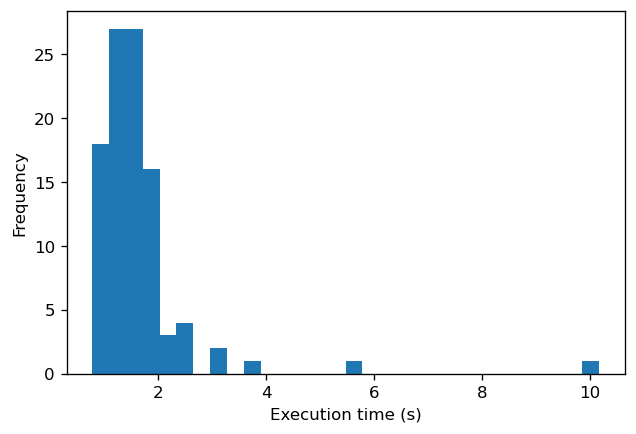

In [18]:
plt.figure(dpi=120); plt.hist(adam, bins=30); plt.xlabel("Execution time (s)"); plt.ylabel("Frequency");

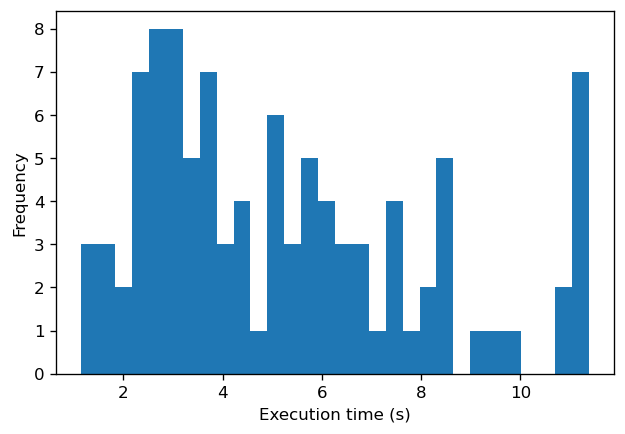

In [19]:
plt.figure(dpi=120); plt.hist(sgd, bins=30); plt.xlabel("Execution time (s)"); plt.ylabel("Frequency");

## Finding the best lr

lr values above were not chosen randomly. I ran this test first, to see what is a good value for it

Progress:   0%, epoch:    0/1000, batch: 109/126, elapsed:   0.16s  Run cancelled: Loss increases significantly.
Suggested param: 0.0003646248458420722


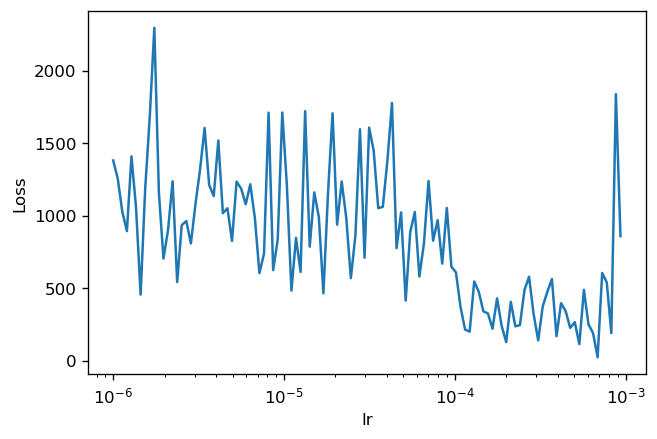

In [51]:
l = newL(optF=lambda p: optim.SGD(p, lr=2e-5, momentum=0.9))
l.cbs.withParamFinder(samples=300);
l.ParamFinder.run()

Progress:   0%, epoch:    1/1000, batch:  32/126, elapsed:   0.32s  Run cancelled: Loss increases significantly.
Suggested param: 0.08248240370490104


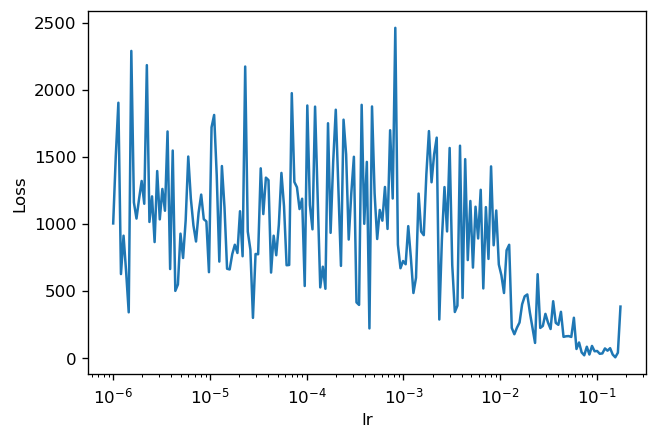

In [58]:
l = newL(optF=lambda p: optim.Adam(p, lr=2e-5))
l.cbs.withParamFinder(samples=300);
l.ParamFinder.run()